In [1]:
import numpy as np
import matplotlib . pyplot as plt
import random
from google.colab import files

In [2]:
#Data preparation
def prepare_data (file_name_dataset) :
  data = np.genfromtxt (file_name_dataset, delimiter =',', skip_header =1).tolist()
  N = len( data )
  tv_data = get_column(data, 0)
  radio_data = get_column(data , 1)
  newspaper_data = get_column(data , 2)
  sales_data = get_column(data, 3)
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X , y
def get_column ( data , index ) :
  result = [row[index] for row in data]
  return result

In [4]:
#Uploading file
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [5]:
X, y = prepare_data('advertising.csv')

**Mean Squared Error**

$L_{MSE}=\frac{1}{2}(y_{hat}−y)^2$

$(u^2)' = 2.u.u'$

**Gradient of Mean Squared Error**

$(L_{MSE})'=(y_{hat}−y)(y_{hat}−y)'$

#Stochastic gradient descent

##Simple linear regression ($y = ax + b$)

In [6]:
#Stochastic gradient descent
def initialize_params () :
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)
  b = 0
  return w1, w2, w3, b
def predict(x1, x2, x3, w1, w2, w3, b):
  result = x1*w1 + x2*w2 + x3*w3 + b
  return result
def update_weight_wi(wi, dl_dwi, lr):
  wi = wi - (lr*dl_dwi)
  return wi
def update_weight_b(b, dl_db, lr):
  b = b - (lr*dl_db)
  return b

def compute_loss_mse(y_hat, y):
  loss = (y_hat - y)**2
  return loss
def compute_gradient_wi_mse(xi, y, y_hat):
  dl_dwi = 2*xi*(y_hat - y)
  return dl_dwi
def compute_gradient_b_mse(y, y_hat):
  dl_db = 2*(y_hat - y)
  return dl_db
def implement_linear_regression_mse(X_data ,y_data ,epoch_max = 2 ,lr = 1e-5):
  losses = []
  w1 , w2 , w3 , b = initialize_params ()
  N = len(y_data)
  for epoch in range (epoch_max) :
    # update parameters for each sample (stochastic gradient descent)
    for i in range (N):
      #get a sample
      x1 = X_data [0][i]
      x2 = X_data [1][i]
      x3 = X_data [2][i]
      y = y_data [i]
      #compute output
      y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )
      # compute loss
      loss = compute_loss_mse (y , y_hat)
      # compute gradient for w1, w2, w3, b
      dl_dw1 = compute_gradient_wi_mse (x1 , y , y_hat)
      dl_dw2 = compute_gradient_wi_mse (x2 , y , y_hat)
      dl_dw3 = compute_gradient_wi_mse (x3 , y , y_hat)
      dl_db = compute_gradient_b_mse (y , y_hat)
      # update parameters w1, w2, w3, b
      w1 = update_weight_wi (w1, dl_dw1, lr )
      w2 = update_weight_wi (w2, dl_dw2, lr )
      w3 = update_weight_wi (w3, dl_dw3, lr )
      b = update_weight_b (b, dl_db, lr )
      # logging
      losses.append(loss)
  return (w1, w2, w3, b,losses)
def plot_losses(losses):
  plt.plot(losses)
  plt.xlabel("#iteration")
  plt.ylabel("Loss")
  plt.show ()

w1: 0.075108516950025,w2: 0.13560859155016636, w3: 0.031813768061146934, b: 0.007448778431394232, last loss: 36.09287594768264
best loss is 7.223391660593948e-05 with index is 295


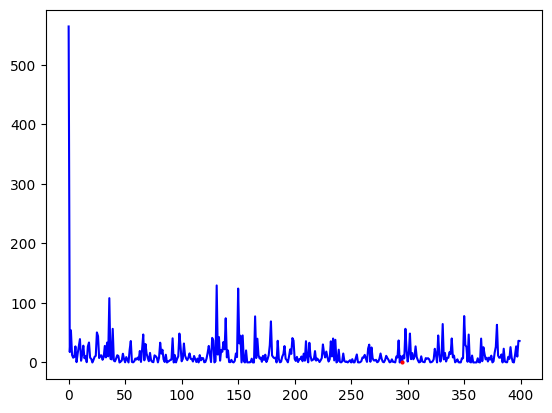

In [13]:
(w1, w2, w3, b, losses) = implement_linear_regression_mse(X, y)
print(f'w1: {w1},w2: {w2}, w3: {w3}, b: {b}, last loss: {losses[-1]}')
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
print(f'best loss is {best_loss} with index is {index_best_loss}')
plt.plot(losses, color ="b")
plt.plot(index_best_loss,best_loss,'ro', markersize=2, label='best loss')
plt.show()

##Multiple Linear Regression ($y = a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n + b$)

In [18]:
#Batch gradient descent
def implement_linear_regression_nsamples_MSE ( X_data , y_data , epoch_max =5000 , lr =1e-5) :
  losses = []
  w1 , w2 , w3 , b = initialize_params()
  N = len( y_data )
  for epoch in range ( epoch_max ) :
      loss_total = 0.0
      dw1_total = 0.0
      dw2_total = 0.0
      dw3_total = 0.0
      db_total = 0.0
      #update parameters for all samples (Batch gradient descent, batch size = len(data))
      for i in range ( N ) :
        x1 = X_data [0][ i ]
        x2 = X_data [1][ i ]
        x3 = X_data [2][ i ]
        y = y_data [ i ]
        y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )

        loss = compute_loss_mse (y , y_hat )
        loss_total = loss_total + loss

        dl_dw1 = compute_gradient_wi_mse ( x1 , y , y_hat )
        dl_dw2 = compute_gradient_wi_mse ( x2 , y , y_hat )
        dl_dw3 = compute_gradient_wi_mse ( x3 , y , y_hat )
        dl_db = compute_gradient_b_mse (y , y_hat )

        dw1_total = dw1_total + dl_dw1
        dw2_total = dw2_total + dl_dw2
        dw3_total = dw3_total + dl_dw3
        db_total = db_total + dl_db

      w1 = update_weight_wi (w1 , dw1_total/N, lr )
      w2 = update_weight_wi (w2 , dw2_total/N, lr )
      w3 = update_weight_wi (w3 , dw3_total/N, lr )
      b = update_weight_b (b ,db_total/N, lr )
      losses.append(loss_total/N)

  return (w1 , w2 , w3 ,b , losses)

w1: 0.0668873842289392,w2: 0.15926455615185323, w3: 0.028008215857595876, b: 0.06923500433789975, last loss: 5.736601977447176
best loss is 5.736601977447176 with index is 4999


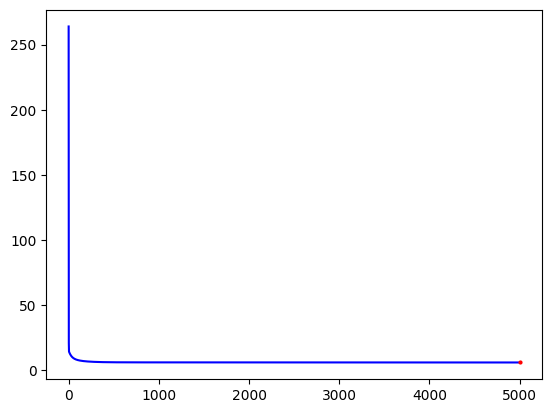

In [19]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples_MSE(X, y)
print(f'w1: {w1},w2: {w2}, w3: {w3}, b: {b}, last loss: {losses[-1]}')
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
print(f'best loss is {best_loss} with index is {index_best_loss}')
plt.plot(losses, color ="b")
plt.plot(index_best_loss,best_loss,'ro', markersize=2, label='best loss')
plt.show()